In [321]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import os
import csv

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [322]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


608

In [323]:
# prepare the cities dataframe

cities_df = pd.DataFrame({ 
    "City": cities
     
    })
cities_df['Lat'] = ""
cities_df['Lng'] = ""
cities_df['Max Temp'] = ""
cities_df['Humidity'] = ""
cities_df['Cloudiness'] = ""
cities_df['Wind Speed'] = ""
cities_df['Country'] = ""


cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,najran,,,,,,,
1,takoradi,,,,,,,
2,poronaysk,,,,,,,
3,koregaon,,,,,,,
4,faya,,,,,,,


In [347]:
# Define URL

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
data_rows = len(cities_df)
for index, row in cities_df.iterrows():
    print(index)
    city = row['City']
    response = requests.get(query_url + city).json()
    
    try:
        print(f"Processing Record {index+1} of {data_rows} | {city}")
        cities_df.loc[index, 'Max Temp'] = response['main']['temp_max'] 
        cities_df.loc[index, 'Humidity'] = response['main']['humidity']
        cities_df.loc[index, 'Cloudiness'] =response['clouds']['all']
        cities_df.loc[index, 'Wind Speed'] = response['wind']['speed']
        cities_df.loc[index, 'Lat'] =response['coord']['lat']
        cities_df.loc[index, 'Lng'] = response['coord']['lon']
        cities_df.loc[index, 'Country'] = response['sys']['country']
        
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
            
        print("------------")
    
    time.sleep(1)


0
Processing Record 1 of 608 | najran
1
Processing Record 2 of 608 | takoradi
2
Processing Record 3 of 608 | poronaysk
3
Processing Record 4 of 608 | koregaon
4
Processing Record 5 of 608 | faya
5
Processing Record 6 of 608 | tsihombe
Missing field/result... skipping.
------------
6
Processing Record 7 of 608 | kodiak
7
Processing Record 8 of 608 | chicama
8
Processing Record 9 of 608 | brazzaville
9
Processing Record 10 of 608 | colorado springs
10
Processing Record 11 of 608 | lubin
11
Processing Record 12 of 608 | jamestown
12
Processing Record 13 of 608 | kapaa
13
Processing Record 14 of 608 | avera
14
Processing Record 15 of 608 | calama
15
Processing Record 16 of 608 | lavrentiya
16
Processing Record 17 of 608 | hilo
17
Processing Record 18 of 608 | amderma
Missing field/result... skipping.
------------
18
Processing Record 19 of 608 | albany
19
Processing Record 20 of 608 | vaini
20
Processing Record 21 of 608 | illoqqortoormiut
Missing field/result... skipping.
------------
21


175
Processing Record 176 of 608 | barrow
176
Processing Record 177 of 608 | morondava
177
Processing Record 178 of 608 | orlik
178
Processing Record 179 of 608 | arrifes
179
Processing Record 180 of 608 | egvekinot
180
Processing Record 181 of 608 | singaraja
181
Processing Record 182 of 608 | plumlov
182
Processing Record 183 of 608 | collingwood
183
Processing Record 184 of 608 | fort collins
184
Processing Record 185 of 608 | wattegama
185
Processing Record 186 of 608 | srednekolymsk
186
Processing Record 187 of 608 | amapa
187
Processing Record 188 of 608 | avarua
188
Processing Record 189 of 608 | vanimo
189
Processing Record 190 of 608 | toora-khem
190
Processing Record 191 of 608 | khakurinokhabl
191
Processing Record 192 of 608 | ketchikan
192
Processing Record 193 of 608 | grand river south east
Missing field/result... skipping.
------------
193
Processing Record 194 of 608 | dzilam gonzalez
194
Processing Record 195 of 608 | nueva guinea
195
Processing Record 196 of 608 | sa

347
Processing Record 348 of 608 | nassjo
348
Processing Record 349 of 608 | mogocha
349
Processing Record 350 of 608 | catuday
350
Processing Record 351 of 608 | thabazimbi
351
Processing Record 352 of 608 | palasa
352
Processing Record 353 of 608 | uhlove
353
Processing Record 354 of 608 | ende
354
Processing Record 355 of 608 | inongo
355
Processing Record 356 of 608 | itarema
356
Processing Record 357 of 608 | halalo
Missing field/result... skipping.
------------
357
Processing Record 358 of 608 | sinnamary
358
Processing Record 359 of 608 | tessalit
359
Processing Record 360 of 608 | nong kung si
360
Processing Record 361 of 608 | christchurch
361
Processing Record 362 of 608 | neiafu
362
Processing Record 363 of 608 | lucapa
363
Processing Record 364 of 608 | behshahr
364
Processing Record 365 of 608 | liverpool
365
Processing Record 366 of 608 | picayune
366
Processing Record 367 of 608 | svetlopolyansk
367
Processing Record 368 of 608 | kamyshla
368
Processing Record 369 of 608

516
Processing Record 517 of 608 | bealanana
517
Processing Record 518 of 608 | broken hill
518
Processing Record 519 of 608 | half moon bay
519
Processing Record 520 of 608 | charlestown
520
Processing Record 521 of 608 | kununurra
521
Processing Record 522 of 608 | sarahan
522
Processing Record 523 of 608 | kamenskoye
Missing field/result... skipping.
------------
523
Processing Record 524 of 608 | pangkalanbuun
524
Processing Record 525 of 608 | borazjan
525
Processing Record 526 of 608 | artyk
Missing field/result... skipping.
------------
526
Processing Record 527 of 608 | ondjiva
527
Processing Record 528 of 608 | kavaratti
528
Processing Record 529 of 608 | mattru
529
Processing Record 530 of 608 | seoul
530
Processing Record 531 of 608 | cap malheureux
531
Processing Record 532 of 608 | bakel
532
Processing Record 533 of 608 | viedma
533
Processing Record 534 of 608 | richards bay
534
Processing Record 535 of 608 | oistins
535
Processing Record 536 of 608 | kelebia
536
Processi

In [349]:
#print(json.dumps(response, sort_keys=True, indent=4))
cities_df.head()
cities_df.to_csv('output_data/Cities_raw_data.csv', index=False)

In [350]:
cities_df["Max Temp"] = pd.to_numeric(cities_df["Max Temp"], downcast="float")
cities_df["Humidity"] = pd.to_numeric(cities_df["Humidity"], downcast="float")
cities_df["Cloudiness"] = pd.to_numeric(cities_df["Cloudiness"], downcast="float")
cities_df["Wind Speed"] = pd.to_numeric(cities_df["Wind Speed"], downcast="float")
cities_df["Lat"] = pd.to_numeric(cities_df["Lat"], downcast="float")
cities_df["Lng"] = pd.to_numeric(cities_df["Lng"], downcast="float")

In [351]:
cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,najran,17.492399,44.127701,93.849998,40.0,100.0,9.40,SA
1,takoradi,4.884500,-1.755400,77.040001,82.0,100.0,9.48,GH
2,poronaysk,49.216702,143.116699,61.250000,96.0,100.0,3.18,RU
3,koregaon,18.650000,74.083298,74.279999,89.0,100.0,13.85,IN
4,faya,18.385099,42.450901,68.519997,49.0,100.0,4.76,SA


In [352]:
Summary_cities = cities_df.describe()

Summary_cities.to_csv('output_data/Cities_Summary_data.csv')
Summary_cities

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000
mean,19.973104,19.888895,71.141869,69.634583,54.541889,7.821999
std,33.587547,89.651680,14.401255,20.943714,41.107708,5.601245
min,-54.799999,-179.166702,31.660000,6.000000,0.000000,0.000000
25%,-8.112000,-53.673500,59.230000,58.000000,9.000000,3.670000
50%,23.833300,20.744699,73.510002,73.000000,65.000000,6.600000
75%,48.681400,100.335403,80.820000,86.000000,100.000000,10.670000
max,78.218597,179.316696,107.910004,100.000000,100.000000,43.439999


In [338]:
# get where humidity is > 100
index = cities_df.index
condition =  cities_df["Humidity"] > 100
humid_indices = index[condition]
humid_indices_list = humid_indices.tolist()
print(humid_indices_list)

[]


In [346]:
clean_city_df = cities_df.replace([cities_df["Humidity"].iloc[humid_indices_list]], value='', inplace=True)
clean_city_df

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [319]:

#clean_city_df = cities_df.drop(humid_indices_list, inplace=True)

#clean_city_df

cities_df.loc[humid_indices_list, cities_df['Humidity', inplace=True]] = ''

SyntaxError: invalid syntax (<ipython-input-319-2ce4942018f6>, line 5)

In [353]:
cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,najran,17.492399,44.127701,93.849998,40.0,100.0,9.40,SA
1,takoradi,4.884500,-1.755400,77.040001,82.0,100.0,9.48,GH
2,poronaysk,49.216702,143.116699,61.250000,96.0,100.0,3.18,RU
3,koregaon,18.650000,74.083298,74.279999,89.0,100.0,13.85,IN
4,faya,18.385099,42.450901,68.519997,49.0,100.0,4.76,SA


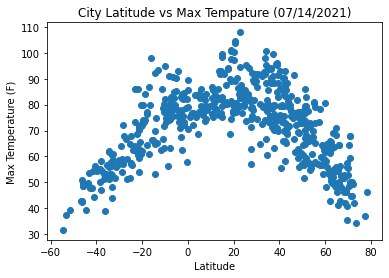

In [354]:
maxtemp = cities_df['Max Temp']
Lat = cities_df['Lat']
plt.scatter(Lat, maxtemp)
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.title('City Latitude vs Max Tempature (07/14/2021)')
plt.savefig("output_data/City_MaxTemp.png")
plt.show()

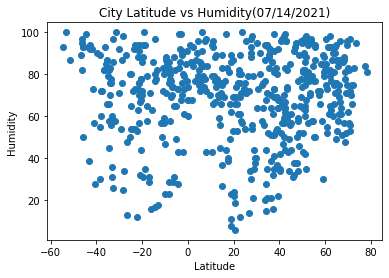

In [355]:
humidity = cities_df['Humidity']
plt.scatter(Lat, humidity)
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.title('City Latitude vs Humidity(07/14/2021)')
plt.savefig("output_data/City_Humidity.png")
plt.show()

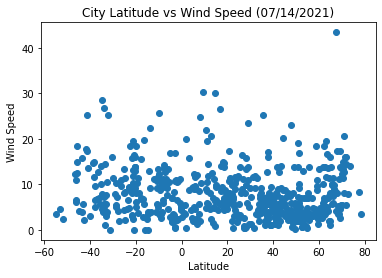

In [358]:
ws= cities_df['Wind Speed']
plt.scatter(Lat, ws)
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.title('City Latitude vs Wind Speed (07/14/2021)')
plt.savefig("output_data/City_Windspeed.png")
plt.show()

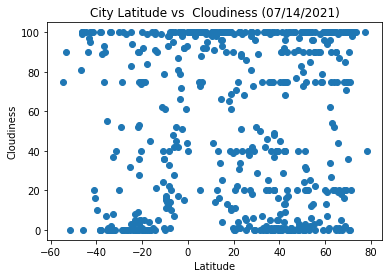

In [359]:
cloud= cities_df['Cloudiness']
plt.scatter(Lat, cloud)
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.title('City Latitude vs  Cloudiness (07/14/2021)')
plt.savefig("output_data/City_Cloudiness.png")
plt.show()

# Linear Regression for Hemispheres and Weather Data

In [384]:
cities_Northern_df= cities_df[cities_df['Lat'] > 0]
cities_Southern_df= cities_df[cities_df['Lat'] < 0]

Northern Hemisphere - Max Temp vs Latitude Linear Regression

The r-squared is: 0.4864


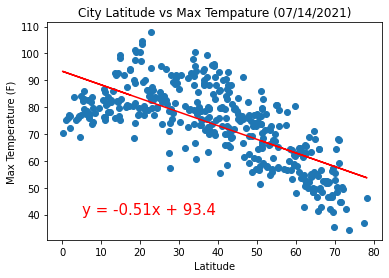

In [385]:
maxtemp = cities_Northern_df['Max Temp']
Lat = cities_Northern_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(Lat, maxtemp)
regress_values =Lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r2 = rvalue**2
plt.scatter(Lat, maxtemp)
plt.plot(Lat,regress_values,"r-")


plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs Max Tempature (07/14/2021)')
plt.annotate(line_eq,(5,40),fontsize=15,color="red", annotation_clip=False)

print(f"The r-squared is: {round(r2,4)}")
plt.savefig("output_data/NHCity_MaxTemp.png")
plt.show()


Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6698


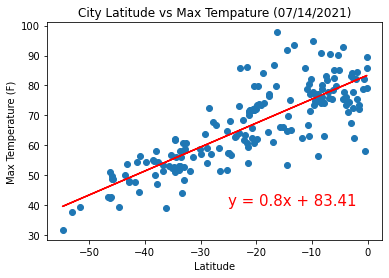

In [386]:
maxtemp = cities_Southern_df['Max Temp']
Lat = cities_Southern_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(Lat, maxtemp)
regress_values = Lat*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r2 = rvalue**2
plt.plot(Lat,regress_values,"r-")
plt.scatter(Lat, maxtemp)


plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs Max Tempature (07/14/2021)')
plt.annotate(line_eq,(-25,40),fontsize=15,color="red", annotation_clip=False)

print(f"The r-squared is: {round(r2,4)}")
plt.savefig("output_data/SHCity_MaxTemp.png")
plt.show()

Data Analysis: Maximum Temperature shows one of the stronger relationships with respect to latitude in both the Northern and Southern Hemispheres.  In the Northern Hemisphere, in July, Max Temperatures decrease with latitude and in the Southern Hemisphere, Max Temperatures decrease with decreasing latitude. This makes sense, as you move away from the equator in Southern and Northern Hemispheres, the temperature tends to decrease. 

 Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.008


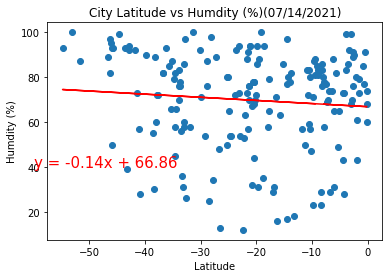

In [387]:
humidity = cities_Southern_df['Humidity']
Lat = cities_Southern_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(Lat, humidity)
regress_values =Lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r2 = rvalue**2
plt.scatter(Lat,humidity)
plt.plot(Lat,regress_values,"r-")


plt.xlabel('Latitude')
plt.ylabel('Humdity (%)')
plt.title('City Latitude vs Humdity(%) (07/14/2021)')
plt.annotate(line_eq,(-60,40),fontsize=15,color="red", annotation_clip=False)

print(f"The r-squared is: {round(r2,4)}")
plt.savefig("output_data/NHCity_Humidity.png")
plt.show()

 Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0068


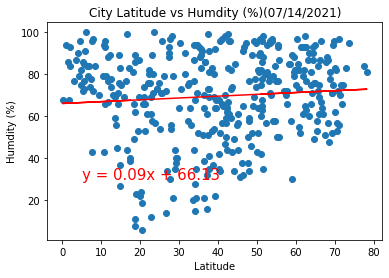

In [388]:
humidity = cities_Northern_df['Humidity']
Lat = cities_Northern_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(Lat, humidity)
regress_values =Lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r2 = rvalue**2
plt.scatter(Lat,humidity)
plt.plot(Lat,regress_values,"r-")


plt.xlabel('Latitude')
plt.ylabel('Humdity (%)')
plt.title('City Latitude vs Humdity(%) (07/14/2021)')
plt.annotate(line_eq,(5,30),fontsize=15,color="red", annotation_clip=False)

print(f"The r-squared is: {round(r2,4)}")
plt.savefig("output_data/SHCity_Humidity.png")
plt.show()

Data Analysis: There is no detectable relationship between Latitude and Humidity on a global basis.  

Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.014


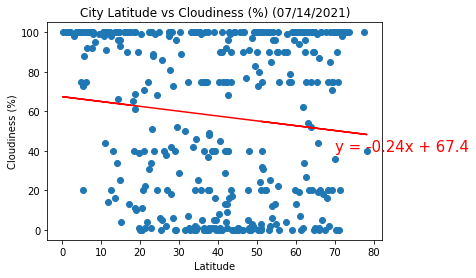

In [389]:
cloudiness = cities_Northern_df['Cloudiness']
Lat = cities_Northern_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(Lat, cloudiness)
regress_values =Lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r2 = rvalue**2
plt.scatter(Lat,cloudiness)
plt.plot(Lat,regress_values,"r-")


plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness (%) (07/14/2021)')
plt.annotate(line_eq,(70,40),fontsize=15,color="red", annotation_clip=False)


print(f"The r-squared is: {round(r2,4)}")
plt.savefig("output_data/NHCity_Cloudiness.png")
plt.show()

Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0081


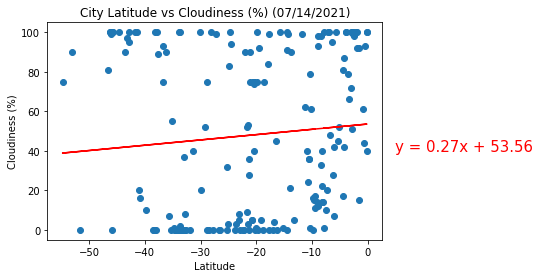

In [390]:
cloudiness = cities_Southern_df['Cloudiness']
Lat = cities_Southern_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(Lat, cloudiness)
regress_values =Lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r2 = rvalue**2
plt.scatter(Lat,cloudiness)
plt.plot(Lat,regress_values,"r-")


plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness (%) (07/14/2021)')
plt.annotate(line_eq,(5,40),fontsize=15,color="red", annotation_clip=False)


print(f"The r-squared is: {round(r2,4)}")
plt.savefig("output_data/SHCity_Cloudiness.png")
plt.show()

Data Analysis: There is no detectable relationship between Latitude and Cloudiness on a global basis.

Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0174


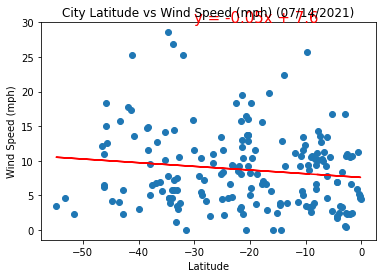

In [391]:
windspeed = cities_Southern_df['Wind Speed']
Lat = cities_Southern_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(Lat, windspeed)
regress_values =Lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r2 = rvalue**2
plt.scatter(Lat,windspeed)
plt.plot(Lat,regress_values,"r-")


plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs Wind Speed (mph) (07/14/2021)')
plt.annotate(line_eq,(-30,30),fontsize=15,color="red", annotation_clip=False)


print(f"The r-squared is: {round(r2,4)}")
plt.savefig("output_data/SHCity_Windspeed.png")
plt.show()

Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0003


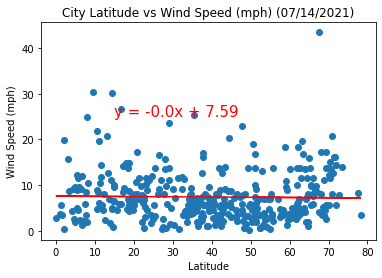

In [392]:
windspeed = cities_Northern_df['Wind Speed']
Lat = cities_Northern_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(Lat, windspeed)
regress_values =Lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r2 = rvalue**2
plt.scatter(Lat,windspeed)
plt.plot(Lat,regress_values,"r-")


plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs Wind Speed (mph) (07/14/2021)')
plt.annotate(line_eq,(15,25),fontsize=15,color="red", annotation_clip=False)


print(f"The r-squared is: {round(r2,4)}")
plt.savefig("output_data/NHCity_Windspeed.png")
plt.show()

In [ ]:
Data Analysis: There is no detectable relationship between Latitude and Wind Speed on a global basis.